# Mount Google Drive


In [1]:
# Load library google drive
from google.colab import drive
drive.mount('gdrive')

root = '/content/gdrive/MyDrive/Colab Notebooks/ML Bangkit/'

Mounted at gdrive


## Load Dataset

In [2]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_excel(root + 'Datasets/preprocessed/data_skenario_3.xlsx')
df = df[['text', 'label']]
df.head()

,text,label
0,nice hotel expensive parking got good deal sta...,hotel
1,ok nothing special charge diamond member hilto...,hotel
2,nice rooms experience hotel monaco seattle goo...,hotel
3,unique great stay wonderful time hotel monaco ...,hotel
4,great stay great stay went seahawk game awesom...,hotel


# Counting Vocabularies

In [4]:
unique = set()
for sentence in df.text:
  words = str(sentence).split()
  for word in words:
    unique.add(word)
vocab_count = len(unique)

## Tokenizing

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing
import pickle

In [10]:
vocab_size = vocab_count
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

def save_tokenizer(tokenizer, path):
  f = open(path, 'wb')
  pickle.dump(tokenizer, f)
  f.close()

def token_and_pad(df, vocab_size=vocab_size, max_length=max_length, trunc_type=trunc_type, padding_type=padding_type, oov_tok=oov_tok):
  sentences = [str(text) for text in df.text]
  tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

  tokenizer.fit_on_texts(sentences)
  word_index = tokenizer.word_index

  sequences = tokenizer.texts_to_sequences(sentences)
  padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

  save_tokenizer(tokenizer, root + 'Saved/tokenizer.pickle')

  return padded

def encode_label(df, column_name):
  label_encoder = preprocessing.LabelEncoder()
  df[column_name]= label_encoder.fit_transform(df[column_name])
  print(label_encoder.classes_)
  return np.array(df[column_name])

In [7]:
X = token_and_pad(df)
print(X)

[[   8    2  345 ...    0    0    0]
 [ 471  267  129 ... 8716   35   58]
 [   8   18   42 ...  215  174   86]
 ...
 [   8    7 2887 ...    0    0    0]
 [  13   60  152 ...    0    0    0]
 [  13 1173  178 ...    0    0    0]]


In [11]:
df_label = encode_label(df, 'label')
df_label

['beach' 'hotel' 'museum' 'restaurant' 'temple']


array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
print(len(X), len(df_label))

5211 5211


# Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df_label, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=40)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

# Modelling and Training

In [ ]:
# Parameters
embedding_dim = 64
lstm_dim = 64
dense_dim = 32

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 64)           1198336   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 1,268,677
Trainable params: 1,268,677
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.config.run_functions_eagerly(True)
NUM_EPOCHS = 20
BATCH_SIZE = 128

# Train the model
hist = model_lstm.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(X_val, y_val))


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


25/25 [==============================] - 24s 956ms/step - loss: 0.6185 - accuracy: 0.2047 - val_loss: 0.5012 - val_accuracy: 0.2466
Epoch 2/20
25/25 [==============================] - 24s 977ms/step - loss: 0.4475 - accuracy: 0.3730 - val_loss: 0.3994 - val_accuracy: 0.4213
Epoch 3/20
25/25 [==============================] - 21s 845ms/step - loss: 0.3658 - accuracy: 0.5403 - val_loss: 0.3463 - val_accuracy: 0.5749
Epoch 4/20
25/25 [==============================] - 21s 855ms/step - loss: 0.2917 - accuracy: 0.7067 - val_loss: 0.2613 - val_accuracy: 0.7390
Epoch 5/20
25/25 [==============================] - 21s 856ms/step - loss: 0.1868 - accuracy: 0.8225 - val_loss: 0.1906 - val_accuracy: 0.7898
Epoch 6/20
25/25 [==============================] - 21s 853ms/step - loss: 0.1612 - accuracy: 0.8241 - val_loss: 0.1992 - val_accuracy: 0.7390
Epoch 7/20
25/25 [==============================] - 21s 862ms/step - loss: 0.1270 - accuracy: 0.9085 - val_loss: 0.1492 - val_accuracy: 0.8551
Epoch 8/20

# Plot Training History

In [ ]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

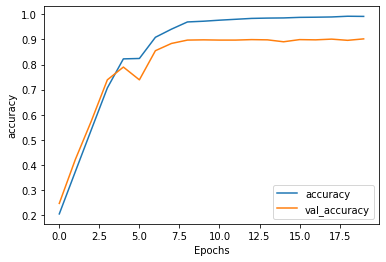

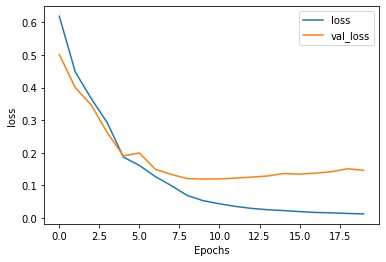

In [ ]:
plot_graphs(hist, 'accuracy')
plot_graphs(hist, 'loss')

# Save Model

In [ ]:
model_lstm.save(root + 'Saved/model_lstm.hdf5')